In this blog post lets discuss the walk-through steps involved in gathering data from an API using the Python programming language. Steps involved in this analysis are as follows:

1. Select the API
2. Select an Endpoint in order to retrive the data
3. Make Requests to retrive the data
4. Populate the data to a pandas dataframe
5. Visualize and gather insights

Lets first understand about API's. The acronym API stands for Application Progamming Interface. APIs allow different programs to interact with each other. Imagine an API as the middle man between the programmer(in our context the data analyst) and the application. The middle man accepts requsts and if that request is allowed, returns data. The middle man also lets the programmer know what sort of data that they can request, how to ask for it, and how to retrive it. The whole process is pretty much similar to ordering a Cappuccino from your local coffee shop(refer diagram below).

<img src="../Resouces/images/07jan2017/api.jpeg">

Select the API  
Lets assume that we are interested in understanding the income distribution of different countries in the world. We can probably use the data API provided by the world bank using the link https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information. This particular API doesnt require us to register for an API key.

Select an Endpoint in order to retrive the data  
All data API endpoints begin with http://api.worldbank.org/v2/ or https://api.worldbank.org/v2/. 
As per the documenation we can learn that the The API: Country Queries endpoint provides the following information which includes the income level:

3 letter ISO 3166-1 alpha-3 code code   
2 letter ISO 3166-1 alpha-2 code code   
Name  
Region id   
Region Name   
Income Level   
Lending Type   
Capital City   
Longitude   
Latitude   

<img src="../Resouces/images/07jan2017/worldbankapi.png">

Make Requests to retrive the data

In [1]:
# Import the relevant libraries
import requests
import pandas as pd
import json

# Construct the query
base_endpoint = "http://api.worldbank.org/v2/"
method = "/countries" 

# Configuration
params = {
            "format" : "json", # we require the response in json format
         }
# request the url and store the response in a variable
response = requests.get(base_endpoint+method,params=params)
# print out the status code attribute of the response object
print(f"status code :{response.status_code}") 
# print out the status code attribute of the response object
print(f"url :{response.url}") 

status code :200
url :http://api.worldbank.org/v2//countries?format=json


The HTTP status code we received for our request is 200 which is the standard response for a successful HTTP request(https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).
We can view the json-encoded content of the response using the url attribute associated with the response object using a broswer like google chrome. Recommend installing the JSON view extension using the google chrome manage extensions. In this particular instance, the response is a list with first element with all the meta data and the second element contains the list of dictionaries for the data that we want to extract. We also can view the json-encoded content using the json method associated with the reponse object. 

In [2]:
# print the first dictionary of the first element of the list. 
# In this particular instance it has the meta data corresponding to the the reponse we received.
print(f"meta data of the response :{response.json()[0]}")

meta data of the response :{'page': 1, 'pages': 7, 'per_page': '50', 'total': 304}


In [3]:
# print the first dictionary of the second element of the list. 
# In this particular instance it has country data for the country Afghanistan
print(f"data retrived for the first element :{response.json()[1][1]}")

data retrived for the first element :{'id': 'AFG', 'iso2Code': 'AF', 'name': 'Afghanistan', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LIC', 'iso2code': 'XM', 'value': 'Low income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Kabul', 'longitude': '69.1761', 'latitude': '34.5228'}


Now we need to decide what data fields we are interested in before we populate the data to a Pandas dataframe. In this particular instance we might be interested in the following fields: iso2code of the country, name of the country, value of the income level

In [4]:
# get the iso2code and the name
print(response.json()[1][1]['iso2Code'])
print(response.json()[1][1]['name'])
# get the value of the income level field
print(response.json()[1][1]['incomeLevel']['value'])

AF
Afghanistan
Low income


Using a python for-loop we will populate the above data for each country to an empty list

In [5]:
# lets store the list of dictionaries with the information for all the countries in a python variable called countries
countries = response.json()[1]

# initialize an empty list to store the dictionaries for all the countries
mylist = [] 
 
# loop through each country
for country in countries:
    mydict = {} # initialize an empty dictionary to store data for each country
    mydict['iso2code']=country['iso2Code']
    mydict['name']=country['name']
    mydict['incomelevel']=country['incomeLevel']['value']
    mylist.append(mydict) # append the dictionary to mylist

We can convert the list to a pandas dataframe using the pd.Dataframe(list of dictionaries). After observing the shape of the the dataframe, we can notice that data from only 50 countries are retrived from the API request. We also know that there were 304 countries in the dataset based on the metadata. It seems that the request had only retrived information for one page where as the data sets spans for 7 pages. We will now tweak our query to incorporate a for loop to loop through each of the the 7 pages.

In [6]:
# convert the list of dictionaries to a pandas dataframe
df = pd.DataFrame(mylist)
display(df.shape)
display(df.head())

(50, 3)

,incomelevel,iso2code,name
0,High income,AW,Aruba
1,Low income,AF,Afghanistan
2,Aggregates,A9,Africa
3,Lower middle income,AO,Angola
4,Upper middle income,AL,Albania


In [7]:
# initialize an empty list to store the dictionaries for all the countries
mylist = [] 

# loop through each page upto 7 pages
for page in list(range(1,8)):

    # Construct the query
    base_endpoint = "http://api.worldbank.org/v2/"
    method = "/countries" 

    # Configuration
    params = {
                "format" : "json", # we require the response in json format
                "page" : page, # we need to include the additional parameter
             }
    # request the url and store the response in a variable
    response = requests.get(base_endpoint+method,params=params)
    
    countries = response.json()[1]
    
    # loop through each country
    for country in countries:
        mydict = {} # initialize an empty dictionary to store data for each country
        mydict['iso2code']=country['iso2Code']
        mydict['name']=country['name']
        mydict['incomelevel']=country['incomeLevel']['value']
        mylist.append(mydict) # append the dictionary to mylist

In [8]:
# convert the list of dictionaries to a pandas dataframe
df = pd.DataFrame(mylist)
display(df.shape)
display(df.head())

(304, 3)

,incomelevel,iso2code,name
0,High income,AW,Aruba
1,Low income,AF,Afghanistan
2,Aggregates,A9,Africa
3,Lower middle income,AO,Angola
4,Upper middle income,AL,Albania


Visualize and gather insights  
Good job in extracting the data! Now let's start the fun part of exploring, visulaizing, and gathering insights about the data we just collected.

In [9]:
# import dependencies
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df['incomelevel'].value_counts()

Aggregates             86
High income            78
Upper middle income    56
Lower middle income    53
Low income             31
Name: incomelevel, dtype: int64

In [11]:
df[df['incomelevel']=='Aggregates'].head(10)

,incomelevel,iso2code,name
2,Aggregates,A9,Africa
6,Aggregates,L5,Andean Region
7,Aggregates,1A,Arab World
17,Aggregates,B4,East Asia & Pacific (IBRD-only countries)
18,Aggregates,B7,Europe & Central Asia (IBRD-only countries)
24,Aggregates,B1,IBRD countries classified as high income
28,Aggregates,B2,Latin America & the Caribbean (IBRD-only count...
31,Aggregates,B3,Middle East & North Africa (IBRD-only countries)
37,Aggregates,B6,Sub-Saharan Africa (IBRD-only countries)
40,Aggregates,C9,Sub-Saharan Africa (IFC classification)


A simple value_counts reveal that there are 86 data records that have aggregate as an income level. After exploring, we can observe that the data records are not associated with country level. Hence lets drop these rows. 

In [12]:
# drop the rows showing income level as aggregate
df = df.drop(df[df['incomelevel']=='Aggregates'].index)

In [13]:
df.shape

(218, 3)

Now the dataframe has only 217 data records which is a reasoable figure for the number of countries of the world. Now lets plot the distribution plot by income level.

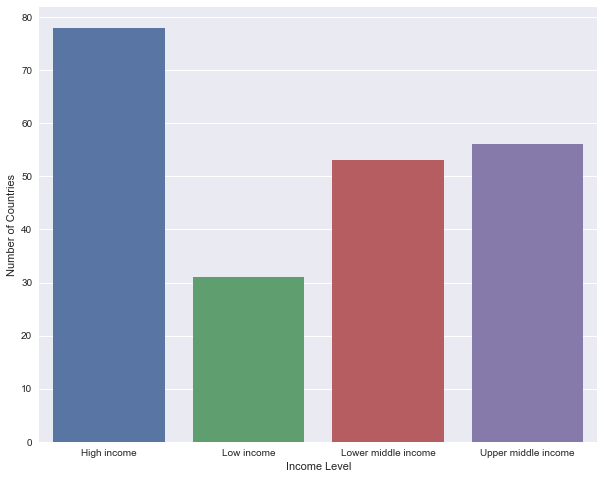

In [14]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
_ = sns.countplot(x="incomelevel", data=df)
_ = plt.ylabel('Number of Countries')
_ = plt.xlabel('Income Level')
plt.show();

Lets export the dataset to a csv and use tableau public to visualize this information in a map!

In [17]:
# export the dataframe
df.to_csv("../Resouces/output/07jan2017/countries.csv", encoding="utf-8", index=False)

Income classification for the current 2018 fiscal year is based on the GNI per capita in dollars https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

low-income 1,005 or less    
lower middle-income 1,006 - 3,955    
upper middle-income 3,956 - 12,235     
high-income economies 12,236 or more  

<img src="../Resouces/images/07jan2017/tableau.png">